<a href="https://colab.research.google.com/github/eikeschuett/IcebergShipDetection/blob/main/Ship_Iceberg_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview



**Topic**: Iceberg and ship detection with satellite imagery

**Goal**: This project is aimed at building an algorithm for the detcetion of ships and icebergs in Sentinel-1 SAR imagery. Desired output is a map, which shows the locations of icebergs, ships and unidentified objects.

**Details**: The dataset used for training is obtained from a Kaggle challenge, [Statoil/C-CORE Iceberg Classifier](https://www.kaggle.com/c/statoil-iceberg-classifier-challenge). Each image has 75x75 pixels with two bands from HH and HV polarisations and contains a ship or an iceberg. This dataset will be used to train a CNN. After training the classification model, we will use Sentinel-1 SAR images to show the "real world application" of our model. The satellite images will be pre-processed with the Sentinel Application Platform (SNAP) Python API. We will then identify bright objects within each satellite image. A 75x75 subset of the radar image will be made for each object and fed into our classification model. Finally, the results will be plotted on a map.

The program is uploaded on a public GitHub repository: [`eikeschuett/IcebergShipDetection`](https://github.com/eikeschuett/IcebergShipDetection)

# Dataset
This project used the satellite SAR imagery provided by Kaggle challenge, [Statoil/C-CORE Iceberg Classifier](https://www.kaggle.com/c/statoil-iceberg-classifier-challenge).
The dataset information is saved in the json file containing the following fields (see Table 1):
* id: the id of the image 
* band_1 & band_2: the flattened image data. Each band has 75x75 pixel values in the list. The values are float numbers with unit being dB with the physical meaning of backscatter coefficient, $\sigma^0$. band_1 and band_2 represent for HH-polarisation and HV polarisation, respectively (see Figure 1 below for having an idea of how the image looks like).
* inc_angle: the incidence angle (see Figure 2). This field has missing data mark as "na", in our project, we gave the "na" a default value of 30°.
* is_iceberg: the target variable, set to 1 if it is an iceberg, and 0 if it is a ship. 

> **Table 1**: A glimpse of `train.json` file <br>

| id |band_1 | band_2 | inc_angle | is_iceberg |
| --------- | ---- | ---------------- | --------------- | ---------------- |
|dfd5f913 |	[-27.878360999999998, -27.15416, -28.668615, -... |	[-27.154118, -29.537888, -31.0306, -32.190483,... |	43.9239 |	0 |
|e25388fd |	[-12.242375, -14.920304999999999, -14.920363, ... |	[-31.506321, -27.984554, -26.645678, -23.76760... |	38.1562 | 0 |
|58b2aaa0 |	[-24.603676, -24.603714, -24.871029, -23.15277... |	[-24.870956, -24.092632, -20.653963, -19.41104... |	45.2859 |	1 |
|4cfc3a18 |	[-22.454607, -23.082819, -23.998013, -23.99805... |	[-27.889421, -27.519794, -27.165262, -29.10350... |	43.8306 |	0 |
|271f93f4 |	[-26.006956, -23.164886, -23.164886, -26.89116... |	[-27.206915, -30.259186, -30.259186, -23.16495... |	35.6256 |	0 |



As the field is_iceberg only exists in `train.json` but not `test.json`, this project only used `train.json` and separated the dataset into training, validation and test datasets with the proportion of $7:2:1$.


In [ ]:
%%html
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/image_iceberg.png" border="0"></a>
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/image_ship.png" border="0"></a>


> **Figure 1**: Examples of SAR images with iceberg and ship in Kaggle dataset.

In [ ]:
%%html
<IMG SRC="https://earth.esa.int/handbooks/asar/aux-files/ephimg-10418557.gif" border="0"></a>

> **Figure 2**: Illustration of incidence angle (source: [ESA earthnet](https://earth.esa.int/handbooks/asar/CNTR5-5.html)).

# Method


## Normalization

This study applied incidence angle normalization method [(Topouzelis et al., 2016)](https://www.degruyter.com/view/journals/geo/8/1/article-p450.xml?tab_body=abstract) to normalize the backscatter coefficient from band_1 (HH) and band_2 (HV) using:

$\sigma_{\theta, norm}^0=\dfrac{\sigma_\theta^0+(0.766\theta-31.638)}{2}$

where<br>
> $\theta$: incidence angle<br>
> $\sigma^0_\theta$: backscatter coefficient at incidence angle $\theta$<br>



## Band 3 Generation

This project test different combinations of HH and HV polarisations data for generating the 3rd bands. 
Addition (+), subtraction (-), multiplication (\*) and division (/) were applied in the test stage.
Addition calculation $HH + HV$ is also known as the **total backscatter**.

According to [Heiselberg (2016)](https://www.mdpi.com/2072-4292/12/15/2353), the **cross polarisation ratio** $C = HV / (HH+HV)$ is a commonly used spatial feature in Ship-Iceberg Classification. 
Thus, the cross polarisation ratio was also applied in the test stage. 
Figure 3 shows loss and accuracy charts applying different generations of band 3.

Check the program [CNN_test_different_3rd_bands_c.ipynb on CNN_Trail_and_Error branch](https://github.com/eikeschuett/IcebergShipDetection/blob/DNN_Trial_and_Error/CNN_test_different_3rd_bands_c.ipynb).




In [ ]:
%%html
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/bands.png" border="0"></a>


> **Figure 3**: Comparing the training results with different band 3.

Most promising combinations are total backscatter HH+HV and cross polarisation ratio HV/(HH+HV) with the validation accuracies 0.860 and 0.866, respectively.

## Image Denoising
Differrnt filters for initial image denoising have been tested in this projecet.
Figure 4 shows the examples of how filters work on ship images and iceberg images.
Figure 5 shows the loss and accuracy charts applying different filters.

Check the program [CNN_test_different_speckle_filters on CNN_Trail_and_Error branch](https://github.com/eikeschuett/IcebergShipDetection/blob/DNN_Trial_and_Error/CNN_test_different_speckle_filters.ipynb).

In [ ]:
%%html
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/filter_iceberg.png" height="520" border="0"></a>
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/filter_ship.png" height="520" border="0"></a>

> **Figure 4**: Examples of filterd SAR images.

In [ ]:
%%html
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/filter.png" border="0"></a>

> **Figure 5**: Comparing the training results with different filters: no filter, bilateral filter, Gaussian filter and Lee filter.

There are not much differecne between the training results, but bilateral filter and Lee filter appear to denoise best. 
As bilateral filter is more time-consuming, this project applied **Lee filter**.

## Optimizer Decision
This project has tested the loss function Binary cross entropy with different optimizers, RMSProp, Adam, SGD and SGD with nesterov momentum, on training our ship-iceberg classifier.
Figure 6 shows the loss and accuracy charts applying different optimizers.

Check the program [CNN_test_different_optimizers.ipynb on the CNN_Trail_and_Error branch](https://github.com/eikeschuett/IcebergShipDetection/blob/DNN_Trial_and_Error/CNN_test_different_speckle_filters.ipynb).

In [ ]:
%%html
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/optimizer.png" border="0"></a>


> **Figure 6**: Comparing the training results with different optimizers: Adam, SGD, SGD with nesterov momentum and RMSProp.




The curves of the loss of SGD+Nesterov and RMSprop is quite jaggy. 
Adam learns fast in the beginning but shows overfitting after approx. 250 to 300 epochs. 
SGD needs more epochs to get nice results, but its curves look the best after 500 epochs.
Table 2 shows the test accuracies with different optimizers

> **Table 2**: Test accuracies with different optimizers

|               | Adam |  SGD | SGD+Nesterov | RMSprop |
|---------------|------|------|--------------|---------|
| Test Accuracy | 0.83 | 0.87 |     0.89     |   0.86  |

Experiences with other models show that Adam is more stable than SGD. This project used **Adam** and paid attention to potential overfitting.

# Outline

1. Download the Kaggle dataset to Google Drive with Kaggle API
2. Build up the CNN architecture for training
3. Train the model
4. Test with real world data

# Download the Kaggle dataset to Google Drive

Following the steps: https://www.kaggle.com/general/74235

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/

Go to your account in Kaggle, scroll to API section and click  on "Create New API Token". Then, the file `kaggle.json` will be downloaded into your local drive, upload it with `files.upload()`.

In [ ]:
from google.colab import files
files.upload()

Make directory named kaggle and copy `kaggle.json` file there.

In [ ]:
!mkdir -p kaggle
!mv kaggle.json kaggle
%cd kaggle/

Download the data to the directory `/content/drive/MyDrive/kaggle/data`

In [ ]:
!mkdir -p data
%cd data
!kaggle competitions download -c carvana-image-masking-challenge

Unzip the *.7z file with the build-in command.

In [ ]:
!7z e test.json.7z 
!7z e train.json.7z 
!7z e sample_submission.csv.7z 

Folder Structure on Google Drive
```
MyDrive/
    kaggle/
        data/
            train.json.7z
            test.json.7z
            sample_submission.csv.7z
            train.json
            test.json
            sample_submission.csv
```

Note that `test.json` data doesn't contain the label `is_iceberg`, so this project only use `train.json` and split the data into training, validation and test data.

# Build up the CNN Architecture

Import the libraries

In [ ]:
import numpy as np # linear algebra
np.random.seed(666)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from subprocess import check_output
from matplotlib import pyplot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
data = pd.read_json('/content/drive/MyDrive/kaggle/data/train.json')

data.inc_angle = data.inc_angle.replace('na', np.nan)

Mounted at /content/drive


In [ ]:
def normalize(sig_nought, inc_angle, default_inc = None):
    """
    :type sig_nought: np.ndarray(np.float)
    :type inc_angle: float
    :rtype: np.ndarray(np.float)
    """
    
    if np.isnan(inc_angle):
        if default_inc != None:
            inc_angle = default_inc
            sig_nought_n = (sig_nought + 0.766 * inc_angle - 31.638) / 2
        else:
            sig_nought_n = sig_nought
    else:
        sig_nought_n = (sig_nought + 0.766 * inc_angle - 31.638) / 2

    return sig_nought_n


In [ ]:
def lee_filter(img, size):
    # From here: https://stackoverflow.com/questions/39785970/speckle-lee-filter-in-python
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

In [ ]:
def prepare_data(data):
    x_angle = np.array(data["inc_angle"])

    # Get the labels (y-values)
    #labels = np.array(data["is_iceberg"])
    #print(labels)
    # Create empty list for the images
    imgs = []
    labels = []

    for i, row in data.iterrows():
      if not np.isnan(row["inc_angle"]):
        labels.append(row["is_iceberg"])
        # Reshape list to image
        hh  = np.reshape(row["band_1"], (75, 75))
        hv  = np.reshape(row["band_2"], (75, 75))

        # normalize hh and hv using inc_angle (x_angle[i])
        # with default inc_angle = 30  # if np.isnan(inc_angle)
        hh = normalize(hh, row["inc_angle"], 30)
        hv = normalize(hv, row["inc_angle"], 30)

        # total backscatter = hh + hv
        b3 = hh + hv
        # cross polarisation ratio = hv / (hh+hv)
        c3 = hv / b3

        # 
        hh = lee_filter(hh, 20)
        hv = lee_filter(hv, 20)
        b3 = lee_filter(b3, 20)      
        c3 = lee_filter(c3, 20) 
          
        # Rescale images between 0 and 1 for faster convergence rate
        hh = (hh - hh.min())/(hh.max()-hh.min())
        hv = (hv - hv.min())/(hv.max()-hv.min())
        b3 = (b3 - b3.min())/(b3.max()-b3.min())
        c3 = (c3 - np.nanmin(c3))/(np.nanmax(c3)-np.nanmin(c3))
        
        # Stack the bands and append them to imgs
        #imgs.append(np.dstack((hh, hv, b3, c3)))
        imgs.append(np.dstack((hh, hv, b3)))
    
    labels = np.array(labels)
    
    # Split dataset into training (70%) and validation (30 %)                             
    x_train, x_val, y_train, y_val = train_test_split(imgs, labels,
                                                     test_size=0.3,
                                                     random_state=0)
    # Then split validation dataset into validation (20 %) and testing (10 %)
    x_val, x_test, y_val, y_test = train_test_split(x_val, y_val,
                                                     test_size=(1/3),
                                                     random_state=0)                               
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_val = np.array(x_val)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

In [ ]:
def prepare_data(data):
    x_angle = np.array(data["inc_angle"])

    # Get the labels (y-values)
    #labels = np.array(data["is_iceberg"])

    # Create empty list for the images
    imgs = []
    imgs_no_inc = []
    labels = []
    labels_no_inc = []
    for i, row in data.iterrows():
        
        if not np.isnan(row["inc_angle"]):
            labels.append(row["is_iceberg"])
            # Reshape list to image
            hh  = np.reshape(row["band_1"], (75, 75))
            hv  = np.reshape(row["band_2"], (75, 75))

            # normalize hh and hv using inc_angle (x_angle[i])
            # with default inc_angle = 30  # if np.isnan(inc_angle)
            hh = normalize(hh, row["inc_angle"], 30)
            hv = normalize(hv, row["inc_angle"], 30)

            # total backscatter = hh + hv
            b3 = hh + hv
            # cross polarisation ratio = hv / (hh+hv)
            c3 = hv / b3

            # 
            hh = lee_filter(hh, 20)
            hv = lee_filter(hv, 20)
            b3 = lee_filter(b3, 20)      
            c3 = lee_filter(c3, 20) 
              
            # Rescale images between 0 and 1 for faster convergence rate
            #hh = (hh - hh.min())/(hh.max()-hh.min())
            #hv = (hv - hv.min())/(hv.max()-hv.min())
            #b3 = (b3 - b3.min())/(b3.max()-b3.min())
            
            # Stack the bands and append them to imgs
            #imgs.append(np.dstack((hh, hv, b3, c3)))
            imgs.append(np.dstack((hh, hv, b3)))
            #imgs.append(np.dstack((hh, hv, c3)))
        else:
            labels_no_inc.append(row["is_iceberg"])

            # Reshape list to image
            hh_no_inc  = np.reshape(row["band_1"], (75, 75))
            hv_no_inc  = np.reshape(row["band_2"], (75, 75))

            # total backscatter = hh + hv
            b3_no_inc = hh_no_inc + hv_no_inc
            # cross polarisation ratio = hv / (hh+hv)
            c3_no_inc = hv_no_inc / b3_no_inc

            # 
            hh_no_inc = lee_filter(hh_no_inc, 20)
            hv_no_inc = lee_filter(hv_no_inc, 20)
            b3_no_inc = lee_filter(b3_no_inc, 20)      
            c3_no_inc = lee_filter(c3_no_inc, 20) 
              
            # Rescale images between 0 and 1 for faster convergence rate
            #hh_no_inc = (hh_no_inc - hh_no_inc.min())/(hh_no_inc.max()-hh_no_inc.min())
            #hv_no_inc = (hv_no_inc - hv_no_inc.min())/(hv_no_inc.max()-hv_no_inc.min())
            #b3_no_inc = (b3_no_inc - b3_no_inc.min())/(b3_no_inc.max()-b3_no_inc.min())
            
            # Stack the bands and append them to imgs
            #imgs_no_inc.append(np.dstack((hh_no_inc, hv_no_inc, b3_no_inc, c3_no_inc)))
            imgs_no_inc.append(np.dstack((hh_no_inc, hv_no_inc, b3_no_inc)))
            #imgs.append(np.dstack((hh, hv, c3)))

    labels = np.array(labels)
    labels_no_inc = np.array(labels_no_inc)
    
    # Split dataset into training (70%) and validation (30 %)                             
    x_train, x_val, y_train, y_val = train_test_split(imgs, labels,
                                                     test_size=0.3,
                                                     random_state=0)
    # Then split validation dataset into validation (20 %) and testing (10 %)
    x_val, x_test, y_val, y_test = train_test_split(x_val, y_val,
                                                     test_size=(1/3),
                                                     random_state=0)

    x_train_no_inc, x_val_no_inc, y_train_no_inc, y_val_no_inc = train_test_split(imgs_no_inc, labels_no_inc,
                                                     test_size=0.3,
                                                     random_state=0)
    # Then split validation dataset into validation (20 %) and testing (10 %)
    x_val_no_inc, x_test_no_inc, y_val_no_inc, y_test_no_inc = train_test_split(x_val_no_inc, y_val_no_inc,
                                                     test_size=(1/3),
                                                     random_state=0)

    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_val = np.array(x_val)
    x_train_no_inc = np.array(x_train_no_inc)
    x_test_no_inc = np.array(x_test_no_inc)
    x_val_no_inc = np.array(x_val_no_inc)

    x_train = np.vstack((x_train, x_train_no_inc))
    x_test = np.vstack((x_test, x_test_no_inc))
    x_val = np.vstack((x_val, x_val_no_inc))

    y_train = np.append(y_train, y_train_no_inc)
    y_test = np.append(y_test, y_test_no_inc)
    y_val = np.append(y_val, y_val_no_inc)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

In [ ]:
x_train, x_val, x_test, y_train, y_val, y_test = prepare_data(data)
print("Number of samples for training: %i (%.2f%%)"%(len(x_train), round(len(x_train)/len(data)*100)))
print("Number of samples for validation: %i (%.2f%%)"%(len(x_val), round(len(x_val)/len(data)*100)))
print("Number of samples for testing: %i (%.2f%%)"%(len(x_test), round(len(x_test)/len(data)*100)))

Number of samples for training: 1029 (64.00%)
Number of samples for validation: 294 (18.00%)
Number of samples for testing: 148 (9.00%)


In [ ]:
batch_size = 32
gen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

gen_flow = gen.flow(x_train, y_train, batch_size = batch_size, seed = 666)


In [ ]:
def create_model(optimizer):
    ac_fct      = "relu"
    #momentum    = 0

    #input_img   = Input(shape=(75, 75, 3), name="X_img")
    input_img   = Input(shape=(75, 75, 4), name="X_img")
    #input_angle = Input(shape=[1], name="angle")

    #cnn = BatchNormalization()(input_img)
    cnn = Conv2D(16, kernel_size=(3,3), activation = "relu")(input_img)
    #cnn = Conv2D(16, kernel_size=(3,3), activation = "relu")(cnn)
    cnn = MaxPooling2D((2,2))(cnn)
    cnn = Dropout(0.1) (cnn)

    cnn = Conv2D(32, kernel_size=(3,3), activation = "relu")(cnn)
    #cnn = Conv2D(32, kernel_size=(3,3), activation = "relu")(cnn)
    cnn = MaxPooling2D((2,2))(cnn)
    cnn = Dropout(0.1)(cnn)

    cnn = Conv2D(64, kernel_size=(3,3), activation = "relu")(cnn)
    #cnn = Conv2D(64, kernel_size=(3,3), activation = "relu") (cnn)
    cnn = MaxPooling2D((2,2))(cnn)
    cnn = Dropout(0.1)(cnn)  

    cnn = Conv2D(128, kernel_size=(3,3), activation = "relu")(cnn)
    cnn = Conv2D(128, kernel_size=(3,3), activation = "relu") (cnn)
    cnn = MaxPooling2D((2,2))(cnn)
    cnn = Dropout(0.1)(cnn)  
    

    cnn = GlobalMaxPooling2D()(cnn)

    #angle = BatchNormalization(momentum=0)(input_angle)
    #angle = Lambda(lambda x: (x - 25)/(45-25))(input_angle)
    
    #concat = (Concatenate()([cnn, angle]))

    #dense = Dense(32, activation="relu") (concat)
    dense = Dense(32, activation="relu")(cnn)
    # dense = BatchNormalization() (dense)
    # dense = Dropout(0.2)(dense)
    
    #dense = Dense(128, activation="relu") (dense)
    #dense = BatchNormalization() (dense)
    #dense = Dropout(0.2)(dense)

    #dense = Dense(128, activation="relu") (dense)
    #dense = BatchNormalization() (dense)
    #dense = Dropout(0.2)(dense)

    output = Dense(1, activation="sigmoid")(dense)

    #model = Model([input_img, input_angle], output)
    model = Model(input_img, output)
    #optimizer = Adam(lr=0.1, epsilon=1e-08, decay=0.0)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

epochs = 250
# learning_rate = 0.1
# decay_rate = learning_rate / epochs
# momentum = 0.8
# sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# from keras.optimizers import Adadelta
model = create_model(optimizer = Adam())
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
X_img (InputLayer)           [(None, 75, 75, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 73, 73, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 32)        0     

# Train the Model

In [23]:
history = model.fit(gen_flow, validation_data=(x_val, y_val),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs)


Epoch 1/250
32/32 [==============================] - 9s 79ms/step - loss: 0.6465 - accuracy: 0.6024 - val_loss: 0.5773 - val_accuracy: 0.6735
Epoch 2/250
32/32 [==============================] - 2s 58ms/step - loss: 0.6154 - accuracy: 0.6558 - val_loss: 0.5429 - val_accuracy: 0.7007
Epoch 3/250
32/32 [==============================] - 2s 58ms/step - loss: 0.5947 - accuracy: 0.6839 - val_loss: 0.5306 - val_accuracy: 0.7177
Epoch 4/250
32/32 [==============================] - 2s 58ms/step - loss: 0.6111 - accuracy: 0.6892 - val_loss: 0.5698 - val_accuracy: 0.7415
Epoch 5/250
32/32 [==============================] - 2s 58ms/step - loss: 0.5620 - accuracy: 0.7265 - val_loss: 0.5274 - val_accuracy: 0.7109
Epoch 6/250
32/32 [==============================] - 2s 58ms/step - loss: 0.5871 - accuracy: 0.6895 - val_loss: 0.5343 - val_accuracy: 0.7551
Epoch 7/250
32/32 [==============================] - 2s 59ms/step - loss: 0.5506 - accuracy: 0.7304 - val_loss: 0.5188 - val_accuracy: 0.7177
Epoch 

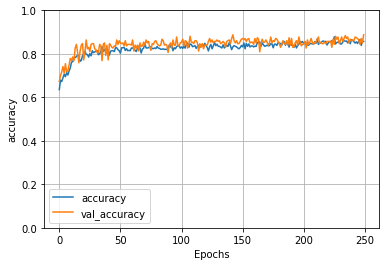

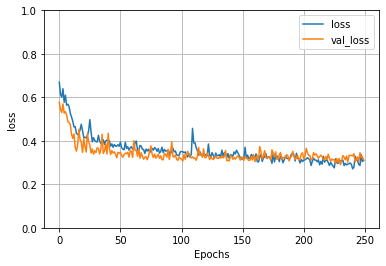

In [24]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string], loc = 'best')
  plt.ylim([0,1])
  plt.grid()
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [25]:
results = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 18ms/step - loss: 0.2859 - accuracy: 0.8851


In [26]:
model.save("/concent/drive/MyDrive/kaggle/model_normalize.hd5")

INFO:tensorflow:Assets written to: /concent/drive/MyDrive/kaggle/model_normalize.hd5/assets


# Test with real world data

## Ship and Iceberg in the real world
With our knowledge about sea ice and ship detection, this project tested with the real world data in Disko Bay (see Figure 7 for the geolocation), which is a hotspot for iceberg and ship on the westcoast of Greenland. 

In [ ]:
%%html
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/Map_test_area_zoomout.jpg"  height="320" border="0"></a>
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/Map_test_area.jpg" height="320" border="0"></a>

> **Figure 7**: Location of Disko Bay

(The information of the Sentinel-1 GRD scene used in our test.)<br>
...download from [Copernicus Open Access Hub](https://scihub.copernicus.eu/dhus/#/home)


> **Table 4**: Information of the test scene ***(Please revise to the one you use)***

| Information | Test scene |
|--|--|
| filename | S1A_IW_GRDH_1SDH_20210115T100027_20210115T100052_036147_043CF4_049C |
| Pass Direction | Descending |
| Product Type | GRD |
| Polarisation | HH HV |
| Absolute Oribt | 36147 |
| Relative Orbit | 25 |
| Sening Time | 2021-01-15T10:00 | 



In [28]:
%%html
<IMG SRC="url" border="0"></a>

> **Figure 8**: The coverage of the test scene

## Preprocessing 
This project followed a standard generic workflow to preprocess  Sentinel-1 GRD data according to [Filipponi (2019)](https://www.mdpi.com/2504-3900/18/1/11) using [Sentinel Application Platform (SNAP)](https://step.esa.int/main/toolboxes/snap/) Python API.

The preprocessing steps in this project contains:
1. Apply Orbit file
2. Calibration
3. (Terrain Correction)
4. Convert to dB

The incidence angles of the images were saved as a GeoTIFF file during preprocessing step as well.

Check the preprocessing program for more details: [preprocessing_s1_scene.py](https://github.com/eikeschuett/IcebergShipDetection/blob/main/preprocessing_s1_scene.py)



## Object detection (need to copy)

First, import all required libraries.

In [29]:
import numpy as np
import os
from PIL import Image
import skimage.measure as measure
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import pandas as pd

import tensorflow as tf
from google.colab import drive

import zipfile


We already mounted the drive and defined a function for the Lee-filter. 

The next step is to import the satellite image. The preprocessed image contains five bands (HH, HV, incidence angle, Latitude, Longitude), which are stored in separate tif-files in a zip-file. We will unzip this file and import the indiviual bands.

In [61]:
# Path to .zip file in my mounted drive
path = "/content/drive/MyDrive/Iceberg_Ship_Classification/Testscenes/"
# Disko bay with icebergs
file = "S1A_IW_GRDH_1SDH_20210115T100027_20210115T100052_036147_043CF4_049C_output.zip" 
#Svalbard scene with ship in the center
#file = "S1B_IW_GRDH_1SDH_20210108T154500_20210108T154525_025065_02FBC6_38D2_output.zip"

# Create temporary working diretory in colab
wdir = "/content/" + file[:-4]
if not os.path.exists(wdir):
    os.makedirs(wdir)
os.chdir(wdir)

with zipfile.ZipFile(path+file, 'r') as zip_ref:
    zip_ref.extractall() # Unzip in working directory

# Import bands
hh = np.array(Image.open(file[:-11] + '_cal_ter_db_UTM_msk_Sigma0_HH_db.tif'))
hv = np.array(Image.open(file[:-11] + '_cal_ter_db_UTM_msk_Sigma0_HV_db.tif'))
inc_angle = np.array(Image.open(file[:-11] + '_cal_ter_db_UTM_msk_IncidenceAngle.tif'))
# Also import the arrays containing the latitude and longtitude data.
lat = np.array(Image.open(file[:-11] + '_cal_ter_db_UTM_msk_lat.tif'))
lon = np.array(Image.open(file[:-11] + '_cal_ter_db_UTM_msk_lon.tif'))



Then, the bands need to be prepared in the same way as our training data.

In [63]:
# Calculate total backscatter
b3 = hh + hv
# cross polarisation ratio = hv / (hh+hv)
c3 = hv / (hh+hv)

hh = lee_filter(hh, 20)
hv = lee_filter(hv, 20)
b3 = lee_filter(b3, 20)      
c3 = lee_filter(c3, 20) 

# Rescale images between 0 and 1 for faster convergence rate
hh = (hh - hh.min())/(hh.max()-hh.min())
hv = (hv - hv.min())/(hv.max()-hv.min())
b3 = (b3 - b3.min())/(b3.max()-b3.min())
c3 = (c3 - np.nanmin(c3))/(np.nanmax(c3)-np.nanmin(c3))

In [33]:
3+3

6

So let's see what our scene looks like.

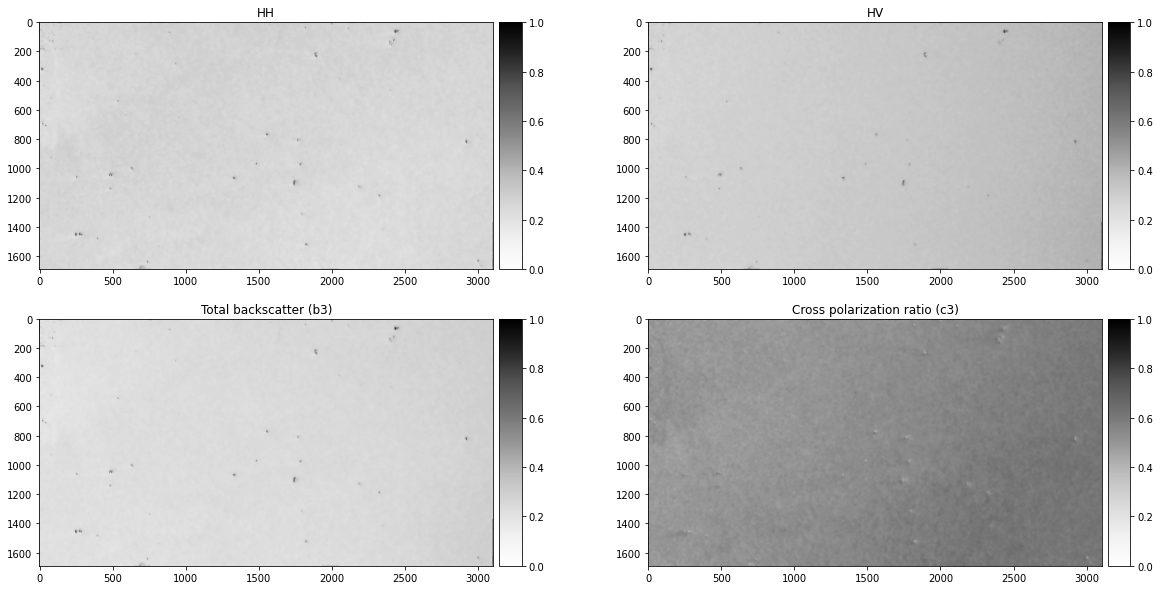

In [64]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
hh_p = axes[0,0].imshow(hh, cmap="Greys")
divider = make_axes_locatable(axes[0,0])
cax = divider.append_axes("right", size="5%", pad=0.08)
fig.colorbar(hh_p, ax=axes[0,0], cax=cax)
axes[0,0].set_title("HH")

hv_p = axes[0,1].imshow(hv, cmap="Greys")
divider = make_axes_locatable(axes[0,1])
cax = divider.append_axes("right", size="5%", pad=0.08)
fig.colorbar(hv_p, ax=axes[0,1], cax=cax)
axes[0,1].set_title("HV")

b3_p = axes[1,0].imshow(b3, cmap="Greys")
axes[1,0].set_title("Total backscatter (b3)")
divider = make_axes_locatable(axes[1,0])
cax = divider.append_axes("right", size="5%", pad=0.08)
fig.colorbar(b3_p, ax=axes[1,0], cax=cax)

b4_p = axes[1,1].imshow(c3, cmap="Greys")
axes[1,1].set_title("Cross polarization ratio (c3)")
divider = make_axes_locatable(axes[1,1])
cax = divider.append_axes("right", size="5%", pad=0.08)
fig.colorbar(b4_p, ax=axes[1,1], cax=cax)

#fig.subplots_adjust(wspace=0.4)

plt.show()


Some bright objects are in the subset of the scene, most likely icebergs. To extract their position, we will calculate a threshold based on the median and the standard deviation of the total backscatter. This is super simple but works quite well.

In [65]:
thresh = np.nanmedian(b3) + 5*np.std(b3)
print(thresh)

0.40862633287906647


All pixels above this threshold are considered to be bight and are likely ships or icebergs.

To extract the locations of the different objects and place a bounding box around them, I create an array with zeros (boring water) and ones (detected object).

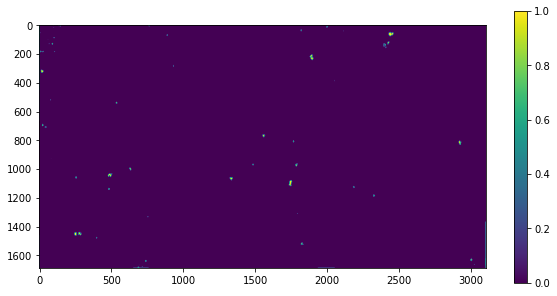

In [68]:
# Create array of zeros
roi = np.zeros(np.shape(b3))
# Mark all potential objects with ones
roi[b3>thresh] = 1

plt.figure(figsize=(10,5)) 
plt.imshow(roi)
plt.colorbar()
plt.show()

The bright objects visible in the total backscatter plot have been succesfully detected.

Several very small objects consisting of just one or two pixels were detected, because the total backscatter of these pixels were above our threshold. These pixels are very likely no real objects but image noise. To get rid of them, a unique value is assigned to each area of pixels with the same value. Then, all very small areas, which consist of less than 3 pixels, are removed from our list of potential objects. Finally, we can get bounding boxes for each detected object.

Some objects (and artefacts due to Lee-Filters behaviour at the edges of the scene) are not fully contained in the scene. Feeding these into the NNs may result in bad predictions, because the object is cut off. For this reason, we will remove all objects which are at the edge of the scene.

Number of potential objects before removing small ones: 78

Number of potential objects after removing small ones: 78



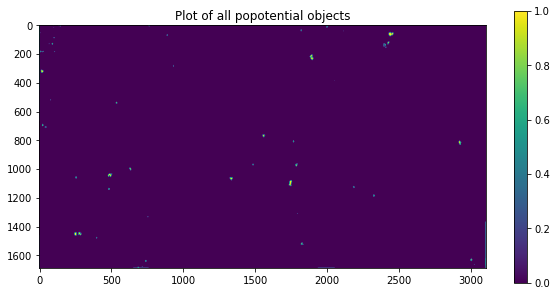


Number of potential objects after removing ones at the edges: 71



In [70]:
# Assign unique value for each region of same values
roi_labeled = measure.label(roi, connectivity=2)
print("Number of potential objects before removing small ones: " + str(np.max(roi_labeled)))

# Count occurences of unique values
unique, counts = np.unique(roi_labeled, return_counts=True)

# Get index of all regions consisting of less then 5 pixels 
# np where returns a tuple of an np.array, [0] at end gets only the np.array
idx = np.where(counts<3)[0]

# Assign 0 to all pixels in the roi-mask that are only small regions
for i in idx:
    roi[roi_labeled==i] = 0
    
# Assign unique value for each region of same values again, now without the small regions
roi_labeled = measure.label(roi, connectivity=2)
print("\nNumber of potential objects after removing small ones: " + str(np.max(roi_labeled)) + "\n")

plt.figure(figsize=(10,5)) 
plt.imshow(roi)
plt.colorbar()
plt.title("Plot of all popotential objects")
plt.show()

# Get bboxes of each region    
bboxes = [area.bbox for area in measure.regionprops(roi_labeled)]

# Remove all bboxes which are at the border of the image (likely not fully within the image)
bboxes = [bound for bound in bboxes if bound[0] > 0 and 
            bound[2]<np.shape(b3)[0] and
            bound[1]>0 and
            bound[3]<np.shape(b3)[1]]

print("\nNumber of potential objects after removing ones at the edges: " + str(len(bboxes)) + "\n")

Prepare python lists for our output and store the edges of the satellite scene in it.


In [71]:
geo_output = []

lat_max, lon_max = np.shape(lat)
lat_max = lat_max-1
lon_max = lon_max-1

geo_output.append([lat[0,0], lon[0,0], "upper left corner", np.nan])
geo_output.append([lat[0,lon_max], lon[0,lon_max], "upper right corner", np.nan])
geo_output.append([lat[lat_max,lon_max], lon[lat_max,lon_max], "lower right orner", np.nan])
geo_output.append([lat[lat_max,0], lon[lat_max,0], "lower right corner", np.nan])

Prepare a plot that shows our objects with a different coloured bounding box, depending on the object type. Then, iterate through all the obects, create a 75x75 subset with each object in the center. This subset is then fed into our model and the result is stored in the python lists.

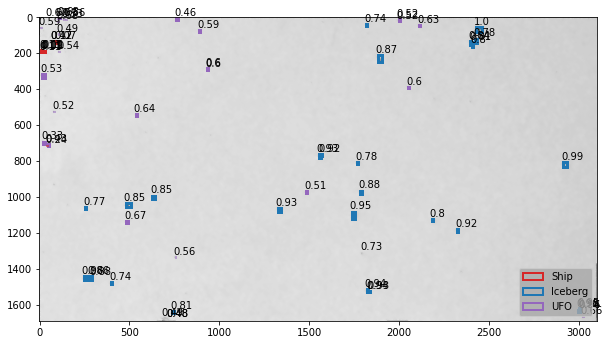

In [72]:
# Linewidth for Plot
lw = 3

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(b3, cmap="Greys")

for bbox in bboxes:
    # Calculate the extend of bbox
    height = bbox[2]-bbox[0]
    width = bbox[3]-bbox[1]
    # coordinates of upper left pexel of bbox (can be used for plotting)
    ul = [bbox[1], bbox[0]]
    
    # Calculate center of bbox
    c_x = (bbox[0]+bbox[2])/2
    c_y = (bbox[1]+bbox[3])/2
    roi_center = [c_x, c_y]

    # Define extend of 75*75 subset with center of bbox in the middle
    # a = sub_roi
    x1 = round(roi_center[0])-38
    x2 = round(roi_center[0])+37
    y1 = round(roi_center[1])-38
    y2 = round(roi_center[1])+37
    
    # If parts of the subset would be out of bounds of original image, place the subplot at the border of the image
    if x1 < 0:
        x1 = 0
        x2 = 75
    if y1 < 0:
        y1 = 0
        y2 = 75
    
    if x2 > np.shape(b3)[0]:
        x1 = np.shape(b3)[0]-76
        x2 = np.shape(b3)[0]-1
        
    if y2 > np.shape(b3)[1]:
        y1 = np.shape(b3)[1]-76
        y2 = np.shape(b3)[1]-1        
    

    sub_hh = hh[x1:x2, y1:y2]
    sub_hv = hv[x1:x2, y1:y2]
    sub_b3 = b3[x1:x2, y1:y2]
    sub_c3 = c3[x1:x2, y1:y2]    

    sub_img = np.dstack((sub_hh, sub_hv, sub_b3, sub_c3))
    sub_img = np.expand_dims(sub_img, axis=0)

    # get local incident angle at the center of the bbox
    # loc_inc = inc_angle[int(roi_center[0]), int(roi_center[1])]
    # loc_inc = (loc_inc - 25)/(45-25)

    # feed sub_img into the model to predict
    # output = model.predict([sub_img, np.array([loc_inc])], batch_size=1)
    output = model.predict(sub_img, batch_size=1)
    
    #print(output)
    
    if output < 0.3:
        # Ship!
        geo_output.append([lat[int(roi_center[0]), int(roi_center[1])],
                             lon[int(roi_center[0]), int(roi_center[1])],
                             "ship", output[0][0]])
        box = mpatches.Rectangle((ul[0], ul[1]), width, height, 
                                 edgecolor='tab:red', linewidth=lw, fill=None)
    elif output > 0.7:
        # Iceberg!
        geo_output.append([lat[int(roi_center[0]), int(roi_center[1])],
                             lon[int(roi_center[0]), int(roi_center[1])],
                             "iceberg", output[0][0]])
        box = mpatches.Rectangle((ul[0], ul[1]), width, height, 
                                 edgecolor='tab:blue', linewidth=lw, fill=None)
    else:
        # Unknown floating object
        geo_output.append([lat[int(roi_center[0]), int(roi_center[1])],
                             lon[int(roi_center[0]), int(roi_center[1])],
                             "UFO", output[0][0]])
        box = mpatches.Rectangle((ul[0], ul[1]), width, height, 
                                 edgecolor='tab:purple', linewidth=lw, fill=None)
    
    ax.add_patch(box)
    ax.text(ul[0]-10, ul[1]-15, str(round(output[0][0],2)))



# Add legend to plot
l1 = mpatches.Patch(edgecolor='tab:red', facecolor='None', lw=2, label='Ship')
l2 = mpatches.Patch(edgecolor='tab:blue', facecolor='None', lw=2, label='Iceberg')
l3 = mpatches.Patch(edgecolor='tab:purple', facecolor='None', lw=2, label='UFO')
legend = ax.legend(handles=[l1, l2, l3], loc='lower right')

legend.legendPatch.set_facecolor('darkgrey')

plt.show()

Finally, save the output-table as a csv-file and prepare a nice geographic map (e.g. with QGIS or cartopy in python). Unfortunately, cartopy wont run in Google Colab, but you can [this Python Code from our GitHub Repository](https://github.com/eikeschuett/IcebergShipDetection/blob/main/final_result_map.py) to produce a map in your own local python environment.

In [ ]:
geo_output = pd.DataFrame(geo_output,columns=['lat', 'lon', 'object', 'probability'])
geo_output.to_csv("/content/drive/MyDrive/Iceberg_Ship_Classification/geo_output_" + file[:-11] +  ".csv", sep="\t", index=False)
geo_output.tail()


And here it is: Our final output!

In [76]:
%%html
<IMG SRC="https://raw.githubusercontent.com/eikeschuett/IcebergShipDetection/main/pic/Map_Iceberg_Ship_Classifier_S1A_IW_GRDH_1SDH_20210115T1000.png"  width="800" border="0"></a>

## Comparison with the ground truth data


```
S1B 2021-01-14T10:07:32-10:15:04
OrbitAbsolute	25149
OrbitRelative	98
S1A_IW_GRDH_1SDH_20210115T100027_20210115T100052_036147_043CF4_049C

Weather: Cloudy with some snow, -5° C to -9° C
```

> **Table 3** : Ground Truth data from [openseamap](https://map.openseamap.org/) in our test area

|       Ship Type      |   Latitude  |   Logitude  |
|----------------------|-------------|-------------|
| Other Type/Auxillary | N69°05.990' | W53°18.654' |
|    Fishing Vessel    | N68°51.626' | W52°47.673' |
| Other Type/Auxillary | N69°23.972' | W51°36.317' |
|    Fishing Vessel    | N68°43.877' | W51°30.219' |
|    Fishing Vessel    | N68°43.825' | W51°21.114' |
|      Cargo Ship      | N76°28.180' | W54°08.052' |



## Plot the map 